<a href="https://colab.research.google.com/github/Teerawa-ctrl/Computer_Vision/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Upload im

In [3]:
# Step 1: Upload and Load Image
from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()

# Load the image as a NumPy array
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)
image = image.convert("RGB")  # Ensure it's in RGB format
image_array = np.array(image)

Saving Teemo_TurnTable_img.jpg to Teemo_TurnTable_img.jpg


In [7]:
image_path

'Teemo_TurnTable_img.jpg'

In [8]:
image_array


array([[[ 61,  94, 113],
        [ 61,  94, 113],
        [ 61,  94, 113],
        ...,
        [ 72,  95, 113],
        [ 72,  95, 113],
        [ 72,  95, 113]],

       [[ 61,  94, 113],
        [ 61,  94, 113],
        [ 61,  94, 113],
        ...,
        [ 72,  95, 113],
        [ 72,  95, 113],
        [ 72,  95, 113]],

       [[ 61,  94, 113],
        [ 61,  94, 113],
        [ 61,  94, 113],
        ...,
        [ 72,  95, 113],
        [ 72,  95, 113],
        [ 72,  95, 113]],

       ...,

       [[163, 153, 102],
        [163, 153, 102],
        [162, 152, 101],
        ...,
        [120, 137, 101],
        [121, 137, 101],
        [120, 137, 101]],

       [[165, 153, 103],
        [165, 153, 103],
        [165, 153, 103],
        ...,
        [123, 138, 105],
        [124, 138, 105],
        [123, 138, 105]],

       [[165, 153, 103],
        [165, 153, 103],
        [165, 153, 103],
        ...,
        [124, 138, 105],
        [124, 138, 105],
        [124, 138, 105]]

#Build adjustment functions

In [41]:
# Step 2: Define point operations
"""
    สมการที่จะนำมาใช้ในการทำภาพให้สว่างมากขึ้นและมืดขึ้นจะใช้สมการดังนี้
    B(i,j) = f(A(i,j)B) โดยให้ A เป็นค่าสีของอินพุต B เป็นค่าสีของเอาท์พุต
"""

def brighten_image(image_array):
    # Brighten using the formula: 1.5 * A(i,j) + 50
    result = 2.0 * image_array + 50
    return np.clip(result, 0, 255).astype(np.uint8)   #np.clip เป็นการกำหนดค่า Array ให้อยู่ในช่วงที่กำหนด

def darken_image(image_array):
    # Darken using the formula: 0.8 * A(i,j) - 50
    """
    สมการแบบ non linear ที่ทำให้ภาพมืดขึ้น
    Imax = 255
    result = image_array - 0.005 * image_array * (Imax - image_array)
    """
    result = 0.8 * image_array - 50
    return np.clip(result, 0, 255).astype(np.uint8)

def enhance_colors(image_array):
    # Enhance colors by scaling up the difference from the mean
    result = 1.65*image_array - 100
    return np.clip(result, 0, 255).astype(np.uint8)

In [42]:
# Step 3: Apply the operations
brightened_image = brighten_image(image_array)
darkened_image = darken_image(image_array)
enhanced_image = enhance_colors(image_array)

#Output

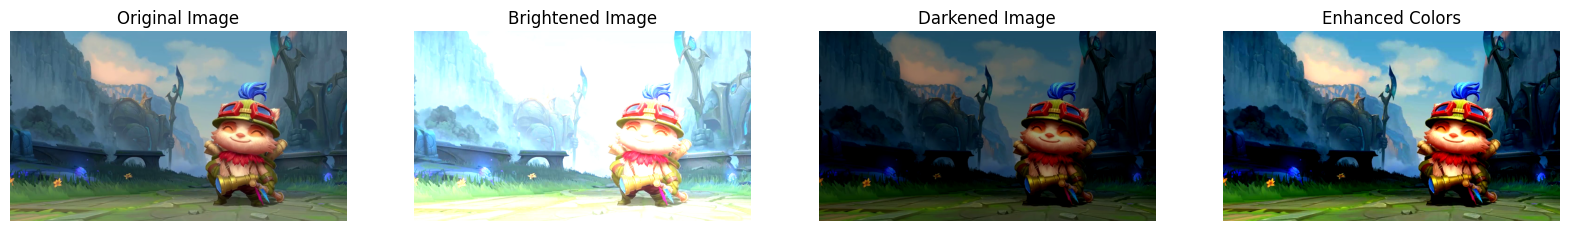

In [43]:
# Step 4: Display original and processed images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(image_array)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(brightened_image)
axes[1].set_title("Brightened Image")
axes[1].axis("off")

axes[2].imshow(darkened_image)
axes[2].set_title("Darkened Image")
axes[2].axis("off")

axes[3].imshow(enhanced_image)
axes[3].set_title("Enhanced Colors")
axes[3].axis("off")

plt.show()